# Telecom Churn Case Study

## Business Problem

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.


## Business Objective
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. The given dataset contains customer-level informations for few consecutive months June, July & August they are encoded as 6,7 & 8. The business objective is to predict the cusotmer which will churn in next month by analyzing the dataset 


## The solution is divided into the following sections: 
- Data Understanding, Preparation, and Pre-Processing
- Feature Engineering and Variable Transformation
- Exploratory Data Analysis
- Model Selection, Model Building, and  Prediction

### 1. Data Understanding, Preparation, and Pre-Processing

In [1]:
#import the libraries required for further analysis
#Load the libraries which will be required further for analysis

import numpy as np
import pandas as pd
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import metrics
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#### We load the train and test datset together and perform the operations cleaning and imputing together

In [3]:
# Load the data set
telecom_data = pd.read_csv("train.csv")
telecom_data.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
#Load the test data set
telecom_data_test = pd.read_csv("test.csv")
telecom_data_test.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [5]:
# Train data set shape
telecom_data.shape 

(69999, 172)

In [6]:
# Test data set shape
telecom_data_test.shape 

(30000, 171)

In [7]:
# check the column types i.e. int, object and float
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [8]:
telecom_data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

##### Check for the columns marked with Object, they need to be converted into right data type after cleansing/imputing

In [9]:
# Check for the columns marked with object, Later need to be converted into right data type
telecom_data.select_dtypes(include='object').head(5)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


In [10]:
# print the columns marked as object
telecom_data_object = telecom_data.select_dtypes(include='object')
telecom_data_object_cols = telecom_data_object.columns.tolist()

print("\n Columns marked with object ::",telecom_data_object_cols)
print("\n Number of columns for data frame ::", len(telecom_data_object_cols))


 Columns marked with object :: ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']

 Number of columns for data frame :: 9


<font color="red"> Observations: </font> 
- ALL the columns marked with objects are date columns, and they contain last date of the month
- Columns for ex: last_date_of_month_6/7/8 can be defaulted with respective last date of the month

In [11]:
# Default the column values for last date of the month
telecom_data['last_date_of_month_6'] = '6/30/2014'
telecom_data['last_date_of_month_7'] = '7/31/2014'
telecom_data['last_date_of_month_8'] = '8/31/2014'

In [12]:
# Common function to print column with missing values
def print_column_with_missing_values(data_frame, threshold = 0):
    column_with_null_values = round(100* (data_frame.isnull().sum().sort_values(ascending = False)/len(data_frame.index)), 2)
    column_with_null_values = column_with_null_values[column_with_null_values > threshold]
    #print(column_with_null_values)
    print('\n Number of columns with missing values :: ', len(column_with_null_values.index))
    return column_with_null_values.to_frame()
    
# impute columns with zero value    
def fill_na_columns_with_zero(data_frame, telecom_data_cols_na):
    df_columns = data_frame.columns
    avail_columns = []
    for column in telecom_data_cols_na:
        if column in df_columns: 
            if column not in avail_columns: avail_columns.append(column)            
    data_frame[avail_columns].fillna(0, inplace=True)
        
        
# print columns with zero variance
def print_columns_with_zero_variance(data_frame, variance = 0):
    data_frame_with_variance = pd.DataFrame(telecom_data.var())
    data_frame_with_variance.columns = ['variance']
    print(data_frame_with_variance[data_frame_with_variance['variance'] == variance])
    
# common function to filter out prefixes from the list of columns.
def filter_columns_with_prefix(data_frame, prefix):
    columns_with_prefix = []
    for col in data_frame.columns.tolist():
        if prefix in col: columns_with_prefix.append(col) 
            
    return columns_with_prefix    

# print the unique column prefixs
def filter_columns_with_unique_prefix(data_frame):
    unique_column_list = []
    for col in data_frame.columns.tolist():
        if '_' in col:
            unique_column = col[0:col.find('_')]
            if unique_column not in unique_column_list: unique_column_list.append(unique_column)                
    return unique_column_list


def filter_columns_with_keyword(data_frame, keyword):
    unique_column_list = []
    for col in data_frame.columns.tolist():
        column_name = '_' + keyword + '_'
        if column_name in col:
            unique_column_list.append(col)
    return unique_column_list

In [13]:
## check for columns with missing or null values
print_column_with_missing_values(telecom_data)


 Number of columns with missing values ::  123


,0
max_rech_data_6,74.90
total_rech_data_6,74.90
arpu_2g_6,74.90
count_rech_3g_6,74.90
count_rech_2g_6,74.90
av_rech_amt_data_6,74.90
arpu_3g_6,74.90
night_pck_user_6,74.90
fb_user_6,74.90
date_of_last_rech_data_6,74.90


In [14]:
# Check for columns where missing values are more than 40%
print_column_with_missing_values(telecom_data, 40)


 Number of columns with missing values ::  30


,0
max_rech_data_6,74.90
total_rech_data_6,74.90
arpu_2g_6,74.90
count_rech_3g_6,74.90
count_rech_2g_6,74.90
av_rech_amt_data_6,74.90
arpu_3g_6,74.90
night_pck_user_6,74.90
fb_user_6,74.90
date_of_last_rech_data_6,74.90


#### Key observavtions:

- columns max_rech_data, total_rech_data , date of last recharge have consistely missing values in each month
- To validate we can run a check on index if it's from same row. These records can be filtered for model building

#### <font color="red">Data insight: Check for records if the missing values are from same row for the same month</font>

In [15]:
# validate missing records for June month
if telecom_data['total_rech_data_6'].isnull().equals(telecom_data['av_rech_amt_data_6'].isnull()):
    print('The missing records index for [june month] are from same rows, total_rech_data_6 & av_rech_amt_data_6')
    
if telecom_data['total_rech_data_6'].isnull().equals(telecom_data['max_rech_data_6'].isnull()):
    print('The missing records index for [june month] are from same rows, total_rech_data_6 & max_rech_data_6')
    

# validate missing record index for june and july month
if telecom_data['total_rech_data_6'].isnull().equals(telecom_data['total_rech_data_7'].isnull()):
    print('\nThe missing records index for [june & july] are from same rows, total_rech_data_6 & total_rech_data_7')
    
    # validate missing record index for june and aug month
if telecom_data['total_rech_data_6'].isnull().equals(telecom_data['total_rech_data_8'].isnull()):
    print('The missing records index for [june & aug] are from same rows, total_rech_data_6 & total_rech_data_8')

The missing records index for [june month] are from same rows, total_rech_data_6 & av_rech_amt_data_6
The missing records index for [june month] are from same rows, total_rech_data_6 & max_rech_data_6


In [16]:
# Validate the average revenue per user for the same month
if telecom_data['arpu_3g_6'].isnull().equals(telecom_data['arpu_2g_6'].isnull()):
    print('The missing records index for [june month] are same for average revenue per user')

if telecom_data['arpu_3g_7'].isnull().equals(telecom_data['arpu_2g_7'].isnull()):
    print('The missing records index for [july month] are same for average revenue per user')
    
if telecom_data['arpu_3g_8'].isnull().equals(telecom_data['arpu_2g_8'].isnull()):
    print('The missing records index for [aug month] are same for average revenue per user')

The missing records index for [june month] are same for average revenue per user
The missing records index for [july month] are same for average revenue per user
The missing records index for [aug month] are same for average revenue per user


#### <font color="red"> Observations</font>:
Missing records index for the customers are same; if the rows are filtered based on above observration we will still have sufficient amount of data to build the model

- Recharge amount data for month june, july & aug
- Average revenue per user for the same month not across the month

- <font color="red"> Records for these rows can safely be imputed with zero values</font>

In [17]:
# Print data dictionary before data cleansing, imputing
telecom_data_dictionary = pd.read_csv("data_dictionary.csv")
telecom_data_dictionary

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [18]:
# print the data to understand more about column nature
telecom_data.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [19]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


#### Observations:
- Columns with Object data type : 9
- Columns with int data type : 28
- Columns with float data type: 135

In [20]:
telecom_data.select_dtypes(include='object').head(5)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


<font color="red">Observations: </font>Only the date objects are of non int/float, others can be safely imputed to zero

### Impute data for columns with missing values

- As the telecom industry primary goal to retain high profile/good customers. 
- If a record has missing value, It may be an indication of customer can opt out for different telecom provider and values can not be imputed with mean, median or mode

Dynamically impute the column values to zero except date object (data-type=object)

In [21]:
# Select the object column data types & missing values and impute the non numerica values with zero
obect_columns = telecom_data.select_dtypes(include='object').columns.tolist()

# selected the columns with missing values
columns_with_missing_values = print_column_with_missing_values(telecom_data)
columns_with_missing_values = list(columns_with_missing_values.index)

# impute the column values to zero
telecom_data_cols_na = []
for column in columns_with_missing_values:
    if (column not in obect_columns): 
        telecom_data[column].fillna(0, inplace=True)
        telecom_data_test[column].fillna(0, inplace=True)


 Number of columns with missing values ::  123


In [22]:
# print the columns with missing value
print_column_with_missing_values(telecom_data)


 Number of columns with missing values ::  6


,0
date_of_last_rech_data_6,74.90
date_of_last_rech_data_7,74.48
date_of_last_rech_data_8,73.69
date_of_last_rech_8,3.52
date_of_last_rech_7,1.76
date_of_last_rech_6,1.57


#### Drop the columns with missing values as they do not have much significance

Columns with date_of_last_rech_data & date_of_last_rech may not be of much significance as the high value customers can be derived from data usages and total recharge amount

In [23]:
# Drop the columns date_of_last_rech & date_of_last_rech_data
telecom_data_cols_drop = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
telecom_data_cols_drop = telecom_data_cols_drop + ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

telecom_data.drop(telecom_data_cols_drop, axis=1, inplace = True)
telecom_data_test.drop(telecom_data_cols_drop, axis=1, inplace = True)

In [24]:
# Last date of month is always constant and these columns can be safely dropped
telecom_data_cols_drop = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']
telecom_data.drop(telecom_data_cols_drop, axis=1, inplace = True)
telecom_data_test.drop(telecom_data_cols_drop, axis=1, inplace = True)

In [25]:
## Check again for the columns with missing values
result = print_column_with_missing_values(telecom_data)


 Number of columns with missing values ::  0


In [26]:
# Check the shape of the dataset
telecom_data.shape

(69999, 163)

#### Columns with zero variance can be dropped safely

In [27]:
# check for columns with zero variance and remove it
print_columns_with_zero_variance(telecom_data)

                  variance
circle_id              0.0
loc_og_t2o_mou         0.0
std_og_t2o_mou         0.0
loc_ic_t2o_mou         0.0
std_og_t2c_mou_6       0.0
std_og_t2c_mou_7       0.0
std_og_t2c_mou_8       0.0
std_ic_t2o_mou_6       0.0
std_ic_t2o_mou_7       0.0
std_ic_t2o_mou_8       0.0


In [28]:
cols_with_0_var = ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']
cols_with_0_var = cols_with_0_var + ['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8']
cols_with_0_var = cols_with_0_var + ['std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

telecom_data.drop(cols_with_0_var, axis=1, inplace = True)
telecom_data_test.drop(cols_with_0_var, axis=1, inplace = True)

In [29]:
print('telecom data set size after dropping zero variance columns', telecom_data.shape)

telecom data set size after dropping zero variance columns (69999, 153)


### Feature Engineering (Derive new features) 

### Create new variable by combing total, rech_amt & rech_data

- Data set contains total_rech_data, av_rech_amt_data and total_data_rech_amt which can be added together to find the total amount spend by customer.
- Filter the customers where total recharge amount > 70th percentile of data, and company can focus on this

In [30]:
# Check for available columns with total keyword and see what they represent
filter_columns_with_prefix(telecom_data, 'total')

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8']

In [31]:
# print all the columns starting with rech_amt
filter_columns_with_keyword(telecom_data, 'rech_amt')

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [32]:
# Check for columsn with rech_data
filter_columns_with_keyword(telecom_data, 'rech_data')

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8']

In [33]:
# Create a new column by combining rech_data_amount & rech_amount
telecom_data['total_rech_6'] = telecom_data['total_rech_amt_6'] + telecom_data['total_rech_data_6'] * telecom_data['av_rech_amt_data_6']
telecom_data['total_rech_7'] = telecom_data['total_rech_amt_7'] + telecom_data['total_rech_data_7'] * telecom_data['av_rech_amt_data_7']
telecom_data['total_rech_8'] = telecom_data['total_rech_amt_8'] + telecom_data['total_rech_data_8'] * telecom_data['av_rech_amt_data_8']

# operation on test data set.
telecom_data_test['total_rech_6'] = telecom_data_test['total_rech_amt_6'] + telecom_data_test['total_rech_data_6'] * telecom_data_test['av_rech_amt_data_6']
telecom_data_test['total_rech_7'] = telecom_data_test['total_rech_amt_7'] + telecom_data_test['total_rech_data_7'] * telecom_data_test['av_rech_amt_data_7']
telecom_data_test['total_rech_8'] = telecom_data_test['total_rech_amt_8'] + telecom_data_test['total_rech_data_8'] * telecom_data_test['av_rech_amt_data_8']

telecom_data.head(5)

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_6,total_rech_7,total_rech_8
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0,77.0,65.0,10.0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,1.0,0.0,710,0.0,0.0,0.0,0,0.0,290.0,50.0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6

#### Observations:
- Create a new column by combining 6 and 7, if customer want to churn out, his next month usages can be compared to this.
- In addition, 70th percentile of the data can be used to filter out good customers which company may want to retain it

In [34]:
# Combine column 6 & 7
telecom_data['total_rech_6_7'] = telecom_data['total_rech_6'] + telecom_data['total_rech_7']
avg_recharge_amount_month_6_7 = round(telecom_data['total_rech_6_7'].mean(), 2)
amount_70th_percentile = np.percentile(avg_recharge_amount_month_6_7, 70)

print("70th percentile of the average recharge amount - ", amount_70th_percentile)

# Customers which should be retained i.e. their recharge amount usages are more than 70%
telecom_data_hv = telecom_data[telecom_data['total_rech_6_7'] >= amount_70th_percentile]

telecom_data.drop(['total_rech_6_7'], axis=1, inplace = True)
telecom_data_hv.drop(['total_rech_6_7'], axis=1, inplace = True)

70th percentile of the average recharge amount -  971.52


In [35]:
print('Total customers data after cleansing ', telecom_data.shape)
print('\nTotal customers data after selecting high profile customers ', telecom_data_hv.shape)

Total customers data after cleansing  (69999, 156)

Total customers data after selecting high profile customers  (20640, 156)


### Data Insight for high value customers churning and not churning

- Analyse the data set for customers churning and not churning

In [36]:
# Filter the columns with churn 1 and zero to see th data distribution
telecom_data_hv_1 = telecom_data_hv[telecom_data_hv['churn_probability'] == 1]
telecom_data_hv_0 = telecom_data_hv[telecom_data_hv['churn_probability'] == 0]

In [37]:
## percentile of data distribution for customers which are not churning
column_with_totals = filter_columns_with_prefix(telecom_data, 'total')
telecom_data_hv_0[column_with_totals].describe()

,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_6,total_rech_7,total_rech_8
count,18937.00000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000,18937.000000
mean,600.40267,631.459051,585.134777,293.855100,304.766936,298.148565,11.747637,11.809579,10.434124,654.914453,665.573005,616.091250,1.694355,1.931721,1.747109,1120.169922,1223.817382,1119.527807
std,674.04969,710.068995,713.587385,361.825008,370.614541,361.508290,9.134160,9.382231,9.349395,564.434004,594.013135,644.469466,2.844540,3.161732,3.110875,1490.506457,1695.746020,1894.557138
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.41000,124.530000,102.540000,76.410000,85.490000,78.990000,6.000000,6.000000,4.000000,360.000000,360.000000,280.000000,0.000000,0.000000,0.000000,548.000000,570.000000,450.000000
50%,405.29000,431.930000,367.740000,188.190000,196.610000,193.880000,9.000000,9.000000,8.000000,561.000000,569.000000,515.000000,1.000000,1.000000,1.000000,788.000000,834.000000,735.000000
75%,848.44000,894.590000,812.060000,377.440000,388.290000,382.110000,14.000000,15.000000,13.000000,823.000000,834.000000,800.000000,2.000000,2.000000,2.000000,1210.000000,1304.000000,1210.000000
max,10674.03000,8224.160000,14043.060000,7716.140000,7442.860000,6066.630000,170.000000,138.000000,138.000000,35190.000000,40335.000000,45320.000000,61.000000,54.000000,60.000000,57866.000000,56075.000000,95884.500000


In [38]:
## percentile of data distribution for customers which are churning
telecom_data_hv_1[column_with_totals].describe()

,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_6,total_rech_7,total_rech_8
count,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000
mean,800.794081,631.837223,218.570716,227.743764,174.170288,61.304739,13.739284,11.104521,5.166765,791.914856,618.106870,252.184381,1.571345,1.320611,0.430417,1205.941574,957.243729,338.027340
std,902.055308,827.349340,492.048312,341.410284,270.975436,136.738921,11.457381,9.766829,6.214754,704.438101,599.745655,448.700548,2.919914,2.920303,1.463521,1253.947203,1292.035182,704.250401
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.910000,16.025000,0.000000,37.820000,14.575000,0.000000,7.000000,5.000000,2.000000,407.500000,229.000000,0.000000,0.000000,0.000000,0.000000,601.000000,386.000000,0.000000
50%,550.830000,330.460000,0.000000,126.240000,87.390000,0.000000,11.000000,8.000000,3.000000,677.000000,526.000000,50.000000,0.000000,0.000000,0.000000,914.000000,686.000000,69.000000
75%,1201.045000,912.965000,209.160000,280.775000,225.470000,57.785000,17.000000,14.000000,6.000000,1016.000000,843.500000,349.000000,2.000000,1.000000,0.000000,1333.000000,1110.000000,466.500000
max,8488.360000,8285.640000,5206.210000,5085.630000,3470.380000,1508.740000,125.000000,98.000000,70.000000,12000.000000,9095.000000,6544.000000,34.000000,43.000000,32.000000,14520.000000,26827.000000,12022.000000


#### Observation:

 - Churn customers (telecom_data_hv_1): We can see from the matrix above that the average data for columns (i.e. otal_rech_num, total_rech_amt, total_rech_data) constantly decreases in next month i.e. June, July & Aug 
 
 - Customers which are not churning (telecom_data_hv_0): data set values remains fairly constant across month

In [39]:
## Check the records count for each type of customers..
print('High value customers records not chruning with probability(0) : ', len(telecom_data_hv_0))
print('High value customers records chruning with probability (1) : ', len(telecom_data_hv_1))

High value customers records not chruning with probability(0) :  18937
High value customers records chruning with probability (1) :  1703


### Aanalysis of night_pack, fb_user, monthly_2g/3g

In [40]:
# Check the column variance
telecom_data_hv.describe(percentiles=[.10,.25,.50,.75,.90,.95,.99])

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_6,total_rech_7,total_rech_8
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.00000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,206

In [41]:
# Check the unique values across each column to find the variation in dataset
telecom_data_hv.nunique()

id                    20640
arpu_6                20105
arpu_7                20117
arpu_8                19442
onnet_mou_6           12922
onnet_mou_7           12950
onnet_mou_8           12153
offnet_mou_6          15863
offnet_mou_7          15920
offnet_mou_8          15116
roam_ic_mou_6          3101
roam_ic_mou_7          2589
roam_ic_mou_8          2567
roam_og_mou_6          3521
roam_og_mou_7          2928
roam_og_mou_8          2958
loc_og_t2t_mou_6       8436
loc_og_t2t_mou_7       8399
loc_og_t2t_mou_8       8104
loc_og_t2m_mou_6      12270
loc_og_t2m_mou_7      12226
loc_og_t2m_mou_8      11842
loc_og_t2f_mou_6       2591
loc_og_t2f_mou_7       2604
loc_og_t2f_mou_8       2508
loc_og_t2c_mou_6       1424
loc_og_t2c_mou_7       1470
loc_og_t2c_mou_8       1440
loc_og_mou_6          13996
loc_og_mou_7          14030
loc_og_mou_8          13356
std_og_t2t_mou_6       8269
std_og_t2t_mou_7       8362
std_og_t2t_mou_8       7645
std_og_t2m_mou_6       9775
std_og_t2m_mou_7    

#### Common function for box plot analysis

In [42]:
# Boxplot for categorical variables to see how they are related to sales price.
def box_plot_analysis(data_frame, vars_cat):   
    plt.figure(figsize=(15, 150))
    for i in enumerate(vars_cat):
        plt.subplot(20, 2,i[0]+1)
        ax = sns.boxplot(data = data_frame, x=i[1], y='churn_probability')
        ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
        ax.set_title(i[1] + " vs Churn prob.", fontsize=14)
        ax.set_xlabel(i[1], fontsize=14)
        ax.set_ylabel("Churn Probability", fontsize=15)
    plt.show()

#### Plot the graph for columns with less variance for data analysis

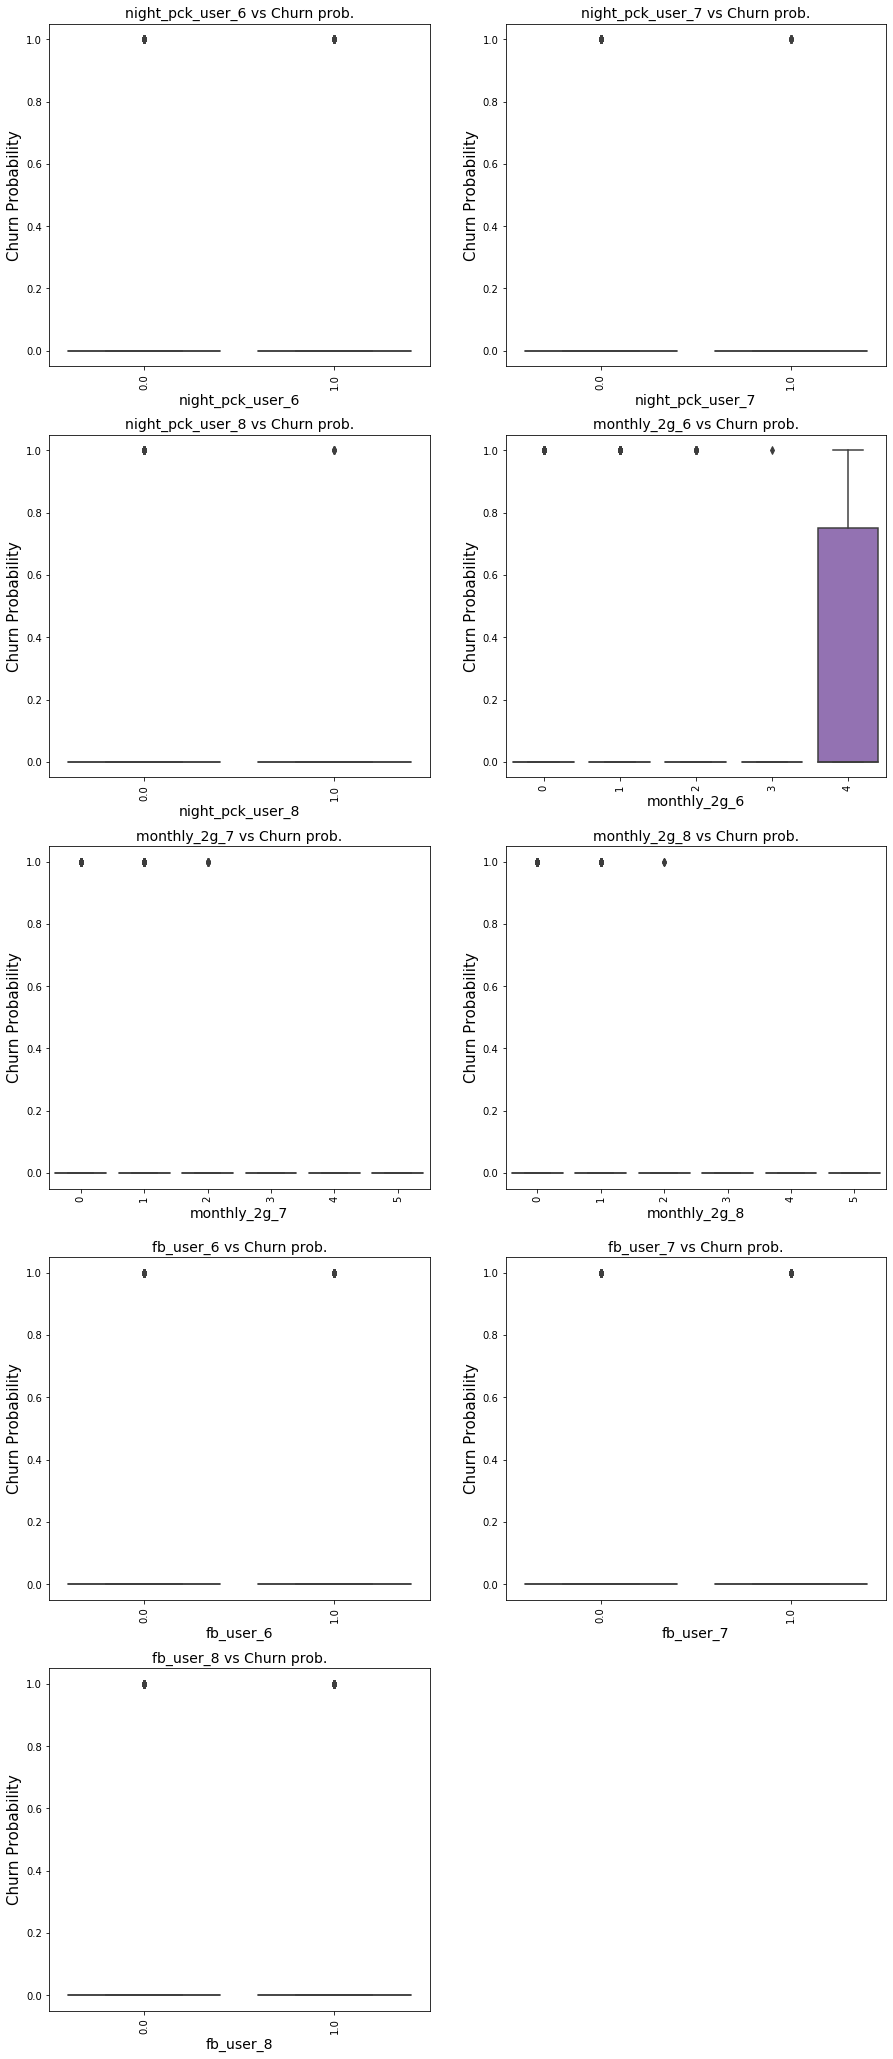

In [43]:
#box plot analysis for columns with less variance
columns_with_less_variance = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
columns_with_less_variance = columns_with_less_variance + ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
columns_with_less_variance = columns_with_less_variance + ['fb_user_6', 'fb_user_7', 'fb_user_8']

box_plot_analysis(telecom_data_hv, columns_with_less_variance)

In [44]:
telecom_data_hv.drop(columns_with_less_variance, axis=1, inplace = True)
telecom_data_test.drop(columns_with_less_variance, axis=1, inplace = True)
print('dataset record size, after dropping the columns ', telecom_data_hv.shape)

dataset record size, after dropping the columns  (20640, 147)


In [45]:
telecom_data_hv.nunique()

id                    20640
arpu_6                20105
arpu_7                20117
arpu_8                19442
onnet_mou_6           12922
onnet_mou_7           12950
onnet_mou_8           12153
offnet_mou_6          15863
offnet_mou_7          15920
offnet_mou_8          15116
roam_ic_mou_6          3101
roam_ic_mou_7          2589
roam_ic_mou_8          2567
roam_og_mou_6          3521
roam_og_mou_7          2928
roam_og_mou_8          2958
loc_og_t2t_mou_6       8436
loc_og_t2t_mou_7       8399
loc_og_t2t_mou_8       8104
loc_og_t2m_mou_6      12270
loc_og_t2m_mou_7      12226
loc_og_t2m_mou_8      11842
loc_og_t2f_mou_6       2591
loc_og_t2f_mou_7       2604
loc_og_t2f_mou_8       2508
loc_og_t2c_mou_6       1424
loc_og_t2c_mou_7       1470
loc_og_t2c_mou_8       1440
loc_og_mou_6          13996
loc_og_mou_7          14030
loc_og_mou_8          13356
std_og_t2t_mou_6       8269
std_og_t2t_mou_7       8362
std_og_t2t_mou_8       7645
std_og_t2m_mou_6       9775
std_og_t2m_mou_7    

### Remove other variables which are not required

In [46]:
# As per data dictionary onnet and offnet represents all kind of calls within same operator and outside. 
# These details are available as part of other attribute as well
cols_to_drop = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']
telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)
print('dataset record size, after dropping the columns ', telecom_data_hv.shape)

dataset record size, after dropping the columns  (20640, 141)


In [47]:
### Remove the maximum columns as we have the data available as part of total recharge column
cols_to_drop = ['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']
telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)
print('dataset record size, after dropping the columns ', telecom_data_hv.shape)

dataset record size, after dropping the columns  (20640, 135)


In [48]:
print('Columns starting with total')
print(filter_columns_with_prefix(telecom_data_hv, 'total'))

print('\nColumns starting with average')
print(filter_columns_with_prefix(telecom_data_hv, 'av_'))

Columns starting with total
['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_6', 'total_rech_7', 'total_rech_8']

Columns starting with average
['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']


In [49]:
### Remove the total recharge data as these columns have been aggregated and imputed as part of total column
cols_to_drop = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)

print('dataset record size, after dropping the columns ', telecom_data_hv.shape)

dataset record size, after dropping the columns  (20640, 129)


In [50]:
# columns with total_rech_num and amt can be dropped as they are not significant and the data is available as part of total_rech
cols_to_drop = ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']
telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)

print('dataset record size, after dropping the columns ', telecom_data_hv.shape)

dataset record size, after dropping the columns  (20640, 123)


In [51]:
# columns with total_rech_num and amt can be dropped as they are not significant and the data is available as part of total_rech
cols_to_drop = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8']
print('dataset record size, after dropping the columns ', telecom_data_hv.shape)

dataset record size, after dropping the columns  (20640, 123)


### Quantitative variable analysis

From distribution of data, we can notice for some of the columns data is distributed across 10,25,50,75,99 percentile of the data. We should plot the graph and check for correlation coefficients.

- arpu (average revenue per user)
- local_og (local outgoing calls)
- total_og ( total outgoing)
- local_ic (local incoming)
- total_rech (total recharge)

In [52]:
telecom_data_hv.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,id,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_6,total_rech_7,total_rech_8
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.00000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,35008.172093,562.096634,562.410098,509.878189,16.134158,12.960838,12.186530,27.511232,20.494406,19.439939,84.330934,85.559078,77.922215,163.279742,161.825765,150.617733,6.280019,6.370866,5.890107,1.600203,1.872133,1.687084,253.898944,253.764039,234.437917,169.094669,175.869773,149.971987,183.203576,190.644406,160.002656,1.783280,1.736340,1.562586,354.085296,368.254234,311.540539,2.365348,2.261847,2.162602,5.898233,7.170192,6.683966,0.680093,0.031985,0.057116,616.936903,631.490254,554.889690,65.224856,66.066892,62.755242,149.643148,149.687766,144.975263,15.390037,16.214662,14.537289,230.267678,231.979037,222.277167,14.540072,15.318915,13.901643,29.

### Observations:

Some of the variables have very less variation in the data set. These columns can be removed and we can create a separate variable to mark if customer is availing any of the facility. For ex:

- roam
- std
- spl
- ic
- isd
- og

### Derive new columns for these features and remove existing attribute.

#### Derive new feature fo roam variable

In [53]:
## derive new columns with prefix
cols_to_drop = filter_columns_with_prefix(telecom_data_hv, 'roam')
cols_to_drop

['roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8']

In [54]:
telecom_data_hv['roam_any_6'] = telecom_data_hv[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1)
telecom_data_hv['roam_any_7'] = telecom_data_hv[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1)
telecom_data_hv['roam_any_8'] = telecom_data_hv[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1)

telecom_data_test['roam_any_6'] = telecom_data_test[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1)
telecom_data_test['roam_any_7'] = telecom_data_test[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1)
telecom_data_test['roam_any_8'] = telecom_data_test[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1)

telecom_data_hv['roam_any_6'] = telecom_data_hv['roam_any_6'].apply(lambda x: 1 if (x>0) else 0)
telecom_data_hv['roam_any_7'] = telecom_data_hv['roam_any_7'].apply(lambda x: 1 if (x>0) else 0)
telecom_data_hv['roam_any_8'] = telecom_data_hv['roam_any_8'].apply(lambda x: 1 if (x>0) else 0)

telecom_data_test['roam_any_6'] = telecom_data_test['roam_any_6'].apply(lambda x: 1 if (x>0) else 0)
telecom_data_test['roam_any_7'] = telecom_data_test['roam_any_7'].apply(lambda x: 1 if (x>0) else 0)
telecom_data_test['roam_any_8'] = telecom_data_test['roam_any_8'].apply(lambda x: 1 if (x>0) else 0)

telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)

In [55]:
# Check for data set with new column
telecom_data_hv.head()

,id,arpu_6,arpu_7,arpu_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8
4,4,240.708,128.191,101.565,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,25,10,30,7.0,6.0,6.0,0.0,1.0,0.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,7,6,6,0,0,0,0,1,0,647,0.0,0.00,0.00,0,1515.0,1473.0,974.0,1,0,0
15,15,580.549,377.294,338.286,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,150,250,1.0,0.0,1.0,0.0,0.0,0.0,260.42,0.00,354.35,0.0,0.00,0.00,0.00,0.00,0.00,164.75,0.00,28.80,0,0,0,0,0,0,0,0,0,602,0.0,0.00,0.00,0,808.0,400.0,806.0,0,0,0
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.00,0.00,950.91,822.78,387.79,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.0,0.0,0.0,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.4,110,50,30,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,455,0.0,0.00,0.00,0,1420.0,990.0,494.0,0,0,0
24,24,371.974,352.069,240.449,93.18,38.29,29.86,159.29,219.44,99.86,0.00,0.00,0.00,0.0,0.00,0.36,252.48,257.74,129.73,0.0,0.0,0.0,371.89,288.31,121.79,0.0,0.0,0.00,371.89,288.31,121.79,0.0,0.0,0.0,0.00,0.00,0.36,0.0,0.0,0.0,624.38,546.06,251.89,52.49,37.84,19.14,170.61,106.71,150.73,0.00,1.53,1.13,223.11,146.09,171.01,0.0,0.0,0.0,6.96,9.54,21.93,0.00,0.00,0.0,6.96,9.54,21.93,230.08,155.64,192.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,110,0,30,1.0,2.0,1.0,0.0,0.0,0.0,0.04,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,1,2,1,0,0,0,0,0,0,1219,0.0,0.00,0.00,0,

#### Derive new feature for local variable as outgoing and incoming variable are already captured

In [56]:
#### Derive new feature for local loc variable
cols_to_drop = filter_columns_with_prefix(telecom_data_hv, 'loc')
cols_to_drop

['loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8']

In [57]:
## train data set
telecom_data_hv['local_any_6'] = telecom_data_hv[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1)
telecom_data_hv['local_any_7'] = telecom_data_hv[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1)
telecom_data_hv['local_any_8'] = telecom_data_hv[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1)

telecom_data_hv['local_any_6'] = telecom_data_hv['local_any_6'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_hv['local_any_7'] = telecom_data_hv['local_any_7'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_hv['local_any_8'] = telecom_data_hv['local_any_8'].apply(lambda x: 1 if (x > 0) else 0)

## test data set
telecom_data_test['local_any_6'] = telecom_data_test[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1)
telecom_data_test['local_any_7'] = telecom_data_test[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1)
telecom_data_test['local_any_8'] = telecom_data_test[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1)

telecom_data_test['local_any_6'] = telecom_data_test['local_any_6'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_test['local_any_7'] = telecom_data_test['local_any_7'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_test['local_any_8'] = telecom_data_test['local_any_8'].apply(lambda x: 1 if (x > 0) else 0)

telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)

In [58]:
#Check the dataset if columns are dropped
telecom_data_hv.head()

,id,arpu_6,arpu_7,arpu_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8
4,4,240.708,128.191,101.565,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,25,10,30,7.0,6.0,6.0,0.0,1.0,0.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,7,6,6,0,0,0,0,1,0,647,0.0,0.00,0.00,0,1515.0,1473.0,974.0,1,0,0,1,1,1
15,15,580.549,377.294,338.286,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,150,250,1.0,0.0,1.0,0.0,0.0,0.0,260.42,0.00,354.35,0.0,0.00,0.00,0.00,0.00,0.00,164.75,0.00,28.80,0,0,0,0,0,0,0,0,0,602,0.0,0.00,0.00,0,808.0,400.0,806.0,0,0,0,1,1,1
23,23,1130.948,905.506,479.762,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,0.0,0.0,0.0,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.4,110,50,30,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,455,0.0,0.00,0.00,0,1420.0,990.0,494.0,0,0,0,1,1,1
24,24,371.974,352.069,240.449,0.0,0.0,0.0,371.89,288.31,121.79,0.0,0.0,0.00,371.89,288.31,121.79,0.0,0.0,0.0,0.00,0.00,0.36,0.0,0.0,0.0,624.38,546.06,251.89,0.0,0.0,0.0,6.96,9.54,21.93,0.00,0.00,0.0,6.96,9.54,21.93,230.08,155.64,192.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,110,0,30,1.0,2.0,1.0,0.0,0.0,0.0,0.04,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,1,2,1,0,0,0,0,0,0,1219,0.0,0.00,0.00,0,463.0,519.0,263.0,0,0,0,1,1,1
27,27,390.489,350.985,421.300,0.0,0.0,0.0,2.53,0.00,0.00,0.0,0.0,0.00,2.53,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,141.74,170.21,195.51,0.0,0.0,0.4,0.00,0.00,0.00,15.43,0.00,0.0,15.43,0.00,0.40,283.48,366.03,350.86,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,110,200,61,4.0,1.0,1.0,0.0,1.0,2.0,5.99,92.93,10.54,374.7,275.38,1342.93,79.35,86.55,161.92,0.18,69.20,161.92,3,1,1,0,0,1,0,1,1,573,700.4,185.71,173.72,0,1385.0,1180.0,892.0,0,0,0,1,1,1


#### Derive new feature for std variable as outgoing and incoming variable are already captured

In [59]:
#### Derive new feature for local loc variable
cols_to_drop = filter_columns_with_prefix(telecom_data_hv, 'std')
cols_to_drop

['std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8']

In [60]:
## train dataset
telecom_data_hv['std_any_6'] = telecom_data_hv[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1)
telecom_data_hv['std_any_7'] = telecom_data_hv[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1)
telecom_data_hv['std_any_8'] = telecom_data_hv[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1)

telecom_data_hv['std_any_6'] = telecom_data_hv['std_any_6'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_hv['std_any_7'] = telecom_data_hv['std_any_7'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_hv['std_any_8'] = telecom_data_hv['std_any_8'].apply(lambda x: 1 if (x > 0) else 0)


## test data set
telecom_data_test['std_any_6'] = telecom_data_test[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1)
telecom_data_test['std_any_7'] = telecom_data_test[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1)
telecom_data_test['std_any_8'] = telecom_data_test[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1)

telecom_data_test['std_any_6'] = telecom_data_test['std_any_6'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_test['std_any_7'] = telecom_data_test['std_any_7'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_test['std_any_8'] = telecom_data_test['std_any_8'].apply(lambda x: 1 if (x > 0) else 0)


telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)

In [61]:
#Check the dataset if columns are dropped
telecom_data_hv.head()

,id,arpu_6,arpu_7,arpu_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8
4,4,240.708,128.191,101.565,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,25,10,30,7.0,6.0,6.0,0.0,1.0,0.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,7,6,6,0,0,0,0,1,0,647,0.0,0.00,0.00,0,1515.0,1473.0,974.0,1,0,0,1,1,1,1,0,0
15,15,580.549,377.294,338.286,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,150,250,1.0,0.0,1.0,0.0,0.0,0.0,260.42,0.00,354.35,0.0,0.00,0.00,0.00,0.00,0.00,164.75,0.00,28.80,0,0,0,0,0,0,0,0,0,602,0.0,0.00,0.00,0,808.0,400.0,806.0,0,0,0,1,1,1,0,1,1
23,23,1130.948,905.506,479.762,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,598.54,448.36,203.29,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.4,110,50,30,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,455,0.0,0.00,0.00,0,1420.0,990.0,494.0,0,0,0,1,1,1,1,0,0
24,24,371.974,352.069,240.449,0.0,0.0,0.0,0.00,0.00,0.36,0.0,0.0,0.0,624.38,546.06,251.89,230.08,155.64,192.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,110,0,30,1.0,2.0,1.0,0.0,0.0,0.0,0.04,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,1,2,1,0,0,0,0,0,0,1219,0.0,0.00,0.00,0,463.0,519.0,263.0,0,0,0,1,1,1,1,1,1
27,27,390.489,350.985,421.300,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,141.74,170.21,195.51,283.48,366.03,350.86,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,110,200,61,4.0,1.0,1.0,0.0,1.0,2.0,5.99,92.93,10.54,374.7,275.38,1342.93,79.35,86.55,161.92,0.18,69.20,161.92,3,1,1,0,0,1,0,1,1,573,700.4,185.71,173.72,0,1385.0,1180.0,892.0,0,0,0,1,1,1,1,0,1


#### Derive new feature combing isd, spl, og and ic

In [62]:
cols_to_drop_isd =  filter_columns_with_prefix(telecom_data_hv, 'isd')
cols_to_drop_spl =  filter_columns_with_prefix(telecom_data_hv, 'spl')
cols_to_drop_og  =  filter_columns_with_prefix(telecom_data_hv, 'og_others')
cols_to_drop_ic  =  filter_columns_with_prefix(telecom_data_hv, 'ic_others')

cols_to_drop = cols_to_drop_isd + cols_to_drop_spl + cols_to_drop_og + cols_to_drop_ic

print('\nColumns starting with isd\n', cols_to_drop_isd)
print('\nColumns starting with spl\n', cols_to_drop_spl)
print('\nColumns starting with og\n', cols_to_drop_og)
print('\nColumns starting with ic\n', cols_to_drop_ic)


Columns starting with isd
 ['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8']

Columns starting with spl
 ['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8']

Columns starting with og
 ['og_others_6', 'og_others_7', 'og_others_8']

Columns starting with ic
 ['ic_others_6', 'ic_others_7', 'ic_others_8']


In [63]:
## train data
telecom_data_hv['spl_any_6'] = telecom_data_hv[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1)
telecom_data_hv['spl_any_7'] = telecom_data_hv[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1)
telecom_data_hv['spl_any_8'] = telecom_data_hv[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1)

telecom_data_hv['spl_any_6'] = telecom_data_hv['spl_any_6'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_hv['spl_any_7'] = telecom_data_hv['spl_any_7'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_hv['spl_any_8'] = telecom_data_hv['spl_any_8'].apply(lambda x: 1 if (x > 0) else 0)

#test data
telecom_data_test['spl_any_6'] = telecom_data_test[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1)
telecom_data_test['spl_any_7'] = telecom_data_test[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1)
telecom_data_test['spl_any_8'] = telecom_data_test[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1)

telecom_data_test['spl_any_6'] = telecom_data_test['spl_any_6'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_test['spl_any_7'] = telecom_data_test['spl_any_7'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_test['spl_any_8'] = telecom_data_test['spl_any_8'].apply(lambda x: 1 if (x > 0) else 0)

telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)

In [64]:
#Check the dataset if columns are dropped
telecom_data_hv.head()

,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8
4,4,240.708,128.191,101.565,63.26,42.94,15.76,21.54,9.36,28.31,25,10,30,7.0,6.0,6.0,0.0,1.0,0.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,7,6,6,0,0,0,0,1,0,647,0.0,0.00,0.00,0,1515.0,1473.0,974.0,1,0,0,1,1,1,1,0,0,0,1,0
15,15,580.549,377.294,338.286,327.64,366.79,391.53,233.18,777.39,629.94,0,150,250,1.0,0.0,1.0,0.0,0.0,0.0,260.42,0.00,354.35,0.0,0.00,0.00,0.00,0.00,0.00,164.75,0.00,28.80,0,0,0,0,0,0,0,0,0,602,0.0,0.00,0.00,0,808.0,400.0,806.0,0,0,0,1,1,1,0,1,1,1,0,0
23,23,1130.948,905.506,479.762,1152.99,822.83,387.81,598.54,448.36,203.29,110,50,30,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,455,0.0,0.00,0.00,0,1420.0,990.0,494.0,0,0,0,1,1,1,1,0,0,1,1,1
24,24,371.974,352.069,240.449,624.38,546.06,251.89,230.08,155.64,192.94,110,0,30,1.0,2.0,1.0,0.0,0.0,0.0,0.04,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,1,2,1,0,0,0,0,0,0,1219,0.0,0.00,0.00,0,463.0,519.0,263.0,0,0,0,1,1,1,1,1,1,0,0,1
27,27,390.489,350.985,421.300,141.74,170.21,195.51,283.48,366.03,350.86,110,200,61,4.0,1.0,1.0,0.0,1.0,2.0,5.99,92.93,10.54,374.7,275.38,1342.93,79.35,86.55,161.92,0.18,69.20,161.92,3,1,1,0,0,1,0,1,1,573,700.4,185.71,173.72,0,1385.0,1180.0,892.0,0,0,0,1,1,1,1,0,1,0,0,0


#### Derive new columns for volume data

In [65]:
cols_to_drop_vol = filter_columns_with_prefix(telecom_data_hv, 'vol')
cols_to_drop_vbc = filter_columns_with_keyword(telecom_data_hv, 'vbc')

cols_to_drop = cols_to_drop_vol + cols_to_drop_vbc

print('\nColumns starting with vol\n', cols_to_drop_vol)
print('\nColumns with keyword vbc\n', cols_to_drop_vbc)


Columns starting with vol
 ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']

Columns with keyword vbc
 ['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']


In [66]:
# train data
telecom_data_hv['data_used_6'] = telecom_data_hv[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
telecom_data_hv['data_used_7'] = telecom_data_hv[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
telecom_data_hv['data_used_8'] = telecom_data_hv[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)

#test data
telecom_data_test['data_used_6'] = telecom_data_test[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
telecom_data_test['data_used_7'] = telecom_data_test[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
telecom_data_test['data_used_8'] = telecom_data_test[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)

telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)

In [67]:
telecom_data_hv.head()

,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,churn_probability,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
4,4,240.708,128.191,101.565,63.26,42.94,15.76,21.54,9.36,28.31,25,10,30,7.0,6.0,6.0,0.0,1.0,0.0,0.00,35.00,0.00,0.00,35.12,0.00,7,6,6,0,0,0,0,1,0,647,0,1515.0,1473.0,974.0,1,0,0,1,1,1,1,0,0,0,1,0,390.80,308.89,213.47
15,15,580.549,377.294,338.286,327.64,366.79,391.53,233.18,777.39,629.94,0,150,250,1.0,0.0,1.0,0.0,0.0,0.0,0.00,0.00,0.00,164.75,0.00,28.80,0,0,0,0,0,0,0,0,0,602,0,808.0,400.0,806.0,0,0,0,1,1,1,0,1,1,1,0,0,260.42,0.00,354.35
23,23,1130.948,905.506,479.762,1152.99,822.83,387.81,598.54,448.36,203.29,110,50,30,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,455,0,1420.0,990.0,494.0,0,0,0,1,1,1,1,0,0,1,1,1,0.00,0.00,0.00
24,24,371.974,352.069,240.449,624.38,546.06,251.89,230.08,155.64,192.94,110,0,30,1.0,2.0,1.0,0.0,0.0,0.0,0.00,0.00,0.00,0.10,0.00,0.00,1,2,1,0,0,0,0,0,0,1219,0,463.0,519.0,263.0,0,0,0,1,1,1,1,1,1,0,0,1,0.04,0.00,0.00
27,27,390.489,350.985,421.300,141.74,170.21,195.51,283.48,366.03,350.86,110,200,61,4.0,1.0,1.0,0.0,1.0,2.0,79.35,86.55,161.92,0.18,69.20,161.92,3,1,1,0,0,1,0,1,1,573,0,1385.0,1180.0,892.0,0,0,0,1,1,1,1,0,1,0,0,0,554.41,554.02,2053.87


In [68]:
# Check the dataset shape
telecom_data_hv.shape

(20640, 54)

In [69]:
telecom_data_hv.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,churn_probability,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,35008.172093,562.096634,562.410098,509.878189,616.936903,631.490254,554.889690,288.400274,293.991447,278.606655,101.904457,100.037597,92.079700,1.250000,1.416424,1.219234,0.434205,0.464874,0.419234,68.163235,69.366297,63.350406,64.453516,65.460841,58.994501,1.074612,1.230766,1.064438,0.220203,0.230087,0.212016,0.214002,0.234787,0.207219,1208.934738,0.082510,1127.246914,1201.822472,1055.046446,0.224225,0.177519,0.185756,0.962016,0.964729,0.929409,0.858140,0.854360,0.818847,0.754990,0.739438,0.714680,638.078532,680.056704,634.581555
std,20156.283820,477.197519,498.156970,523.252905,697.850864,720.446236,705.215348,360.635522,365.195680,354.532469,145.863834,140.580545,139.780036,2.510813,2.771896,2.558194,1.181660,1.299266,1.312712,180.666127,184.237249,172.973148,160.801038,167.835135,155.208723,2.516105,2.782329,2.556255,0.608664,0.656761,0.618458,1.004176,1.111765,1.139241,954.399002,0.275146,1472.589636,1667.730628,1838.562833,0.417081,0.382117,0.388919,0.191163,0.184469,0.256147,0.348915,0.352753,0.385154,0.430103,0.438952,0.451578,1295.614106,1309.735780,1291.660085
min,4.000000,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.370000,-26.040000,-24.490000,-15.320000,-13.090000,-24.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17598.500000,308.699250,310.036750,231.611000,115.640000,115.407500,73.020000,72.587500,78.367500,61.787500,25.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,460.000000,0.000000,550.000000,558.000000,400.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34971.000000,486.918000,483.588000,429.853000,412.690000,425.895000,334.835000,182.930000,187.170000,173.635000,67.000000,50.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,853.000000,0.000000,797.000000,822.000000,692.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.020

### Data Visualization (EDA: Exploratory data analysis)

### Average revenue per user
We can see from telecom_data_hv.describe() how the average revenue per user columns is distributed. 
We can see some outliers in the data, but 99% of the data are well within range

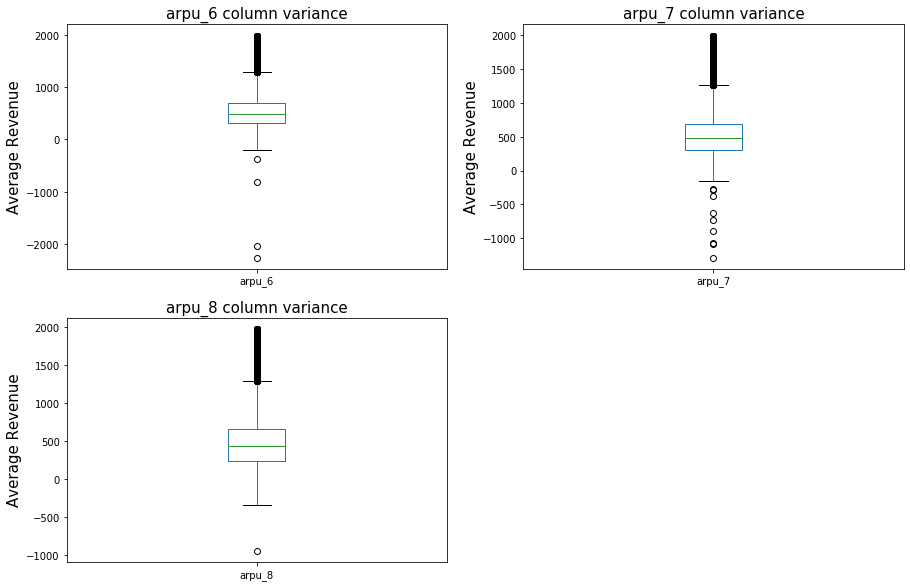

In [70]:
plt.figure(figsize=(15, 80))
box_plot_cols = ['arpu_6', 'arpu_7', 'arpu_8']
for i in enumerate(box_plot_cols):
    plt.subplot(15, 2, i[0]+1)
    ax = telecom_data_hv[(telecom_data_hv[i[1]] < telecom_data_hv[i[1]].quantile(0.99))][i[1]]
    ax1 = ax.plot.box()
    ax1.set_title(i[1] + " column variance", fontsize=15)
    ax1.set_ylabel("Average Revenue", fontsize=15)
plt.show()

### Model Building (PCA)

In [71]:
X_train = telecom_data_hv.drop(['id','churn_probability'], axis=1)
y_train = telecom_data_hv['churn_probability']

X_test  = telecom_data_test.drop(['id'], axis=1)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
## Scaling only features which are numeric
columns_to_transform = X_train.columns.tolist()

X_train[columns_to_transform] = scaler.fit_transform(X_train[columns_to_transform]) 
X_test[columns_to_transform] = scaler.fit_transform(X_test[columns_to_transform]) 

In [74]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)
# Components from the PCA
pca.components_

array([[ 5.64449547e-02,  6.67095761e-02,  7.18908730e-02, ...,
         2.19308371e-01,  2.34780579e-01,  2.33147580e-01],
       [ 1.85810008e-01,  1.94751318e-01,  1.82297742e-01, ...,
        -3.55737322e-03, -8.65066937e-04,  6.27406825e-03],
       [ 1.72399830e-01,  2.15223108e-01,  2.33458366e-01, ...,
        -6.03053294e-02, -4.03776400e-02, -1.16745715e-02],
       ...,
       [-3.38853641e-16,  3.35443781e-16, -1.62140776e-17, ...,
         3.12557088e-16, -1.13529046e-16,  9.63789315e-17],
       [-0.00000000e+00,  1.31630157e-16, -1.41908298e-16, ...,
        -2.43872369e-17, -1.43632728e-16,  5.75384974e-17],
       [ 0.00000000e+00, -2.02432090e-16,  4.27768964e-17, ...,
        -1.20161784e-16, -4.99437492e-17,  7.49986385e-18]])

In [75]:
pca.explained_variance_ratio_

array([2.00908446e-01, 1.22962075e-01, 9.04513695e-02, 5.50782149e-02,
       5.28676946e-02, 4.15497195e-02, 3.91284300e-02, 3.24489527e-02,
       2.89943118e-02, 2.78905920e-02, 2.47634822e-02, 2.28914233e-02,
       1.72660746e-02, 1.67879283e-02, 1.63710615e-02, 1.55632658e-02,
       1.52800059e-02, 1.44956345e-02, 1.39864969e-02, 1.26476626e-02,
       1.21777700e-02, 1.14347379e-02, 1.09819570e-02, 1.06018092e-02,
       1.01260928e-02, 9.02936760e-03, 8.83808885e-03, 7.02720094e-03,
       6.16297172e-03, 5.92338100e-03, 5.20232510e-03, 5.10121629e-03,
       4.93190606e-03, 4.71546837e-03, 3.87450404e-03, 3.01225540e-03,
       2.96840335e-03, 2.58771920e-03, 2.29591451e-03, 2.16379078e-03,
       1.69557336e-03, 1.64696054e-03, 1.61030738e-03, 1.26169203e-03,
       9.53082165e-04, 7.92017755e-04, 3.38853578e-04, 1.13273279e-04,
       9.85177557e-05, 3.96222047e-32, 7.14926651e-34, 7.14926651e-34])

Looking at the explained variance ratio for each component

In [76]:
## Verifying PC and variables
column_names = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':column_names})
pcs_df.head(20)

,PC1,PC2,Feature
0,0.056445,0.185810,arpu_6
1,0.066710,0.194751,arpu_7
2,0.071891,0.182298,arpu_8
3,-0.057459,0.170550,total_og_mou_6
4,-0.057818,0.182390,total_og_mou_7
5,-0.039631,0.171483,total_og_mou_8
6,-0.003718,0.110380,total_ic_mou_6
7,-0.001283,0.121400,total_ic_mou_7
8,0.003880,0.117867,total_ic_mou_8
9,0.054331,0.132197,last_day_rch_amt_6


Making a scree plot for the explained variance

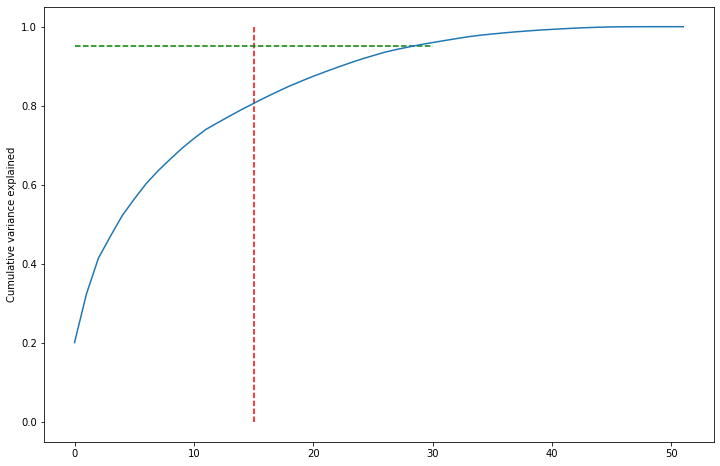

In [77]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Cumulative variance explained")
plt.show()

- From the scree plot we acn see that approximately 25-30 variables can explain 95% of data variance
- With 25 variables we can explain 90% of variance.

#### Perform PCA with 25 components

In [78]:
pca_final = IncrementalPCA(n_components=25)
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(20640, 25)

In [79]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(30000, 25)

In [80]:
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(25, 25)

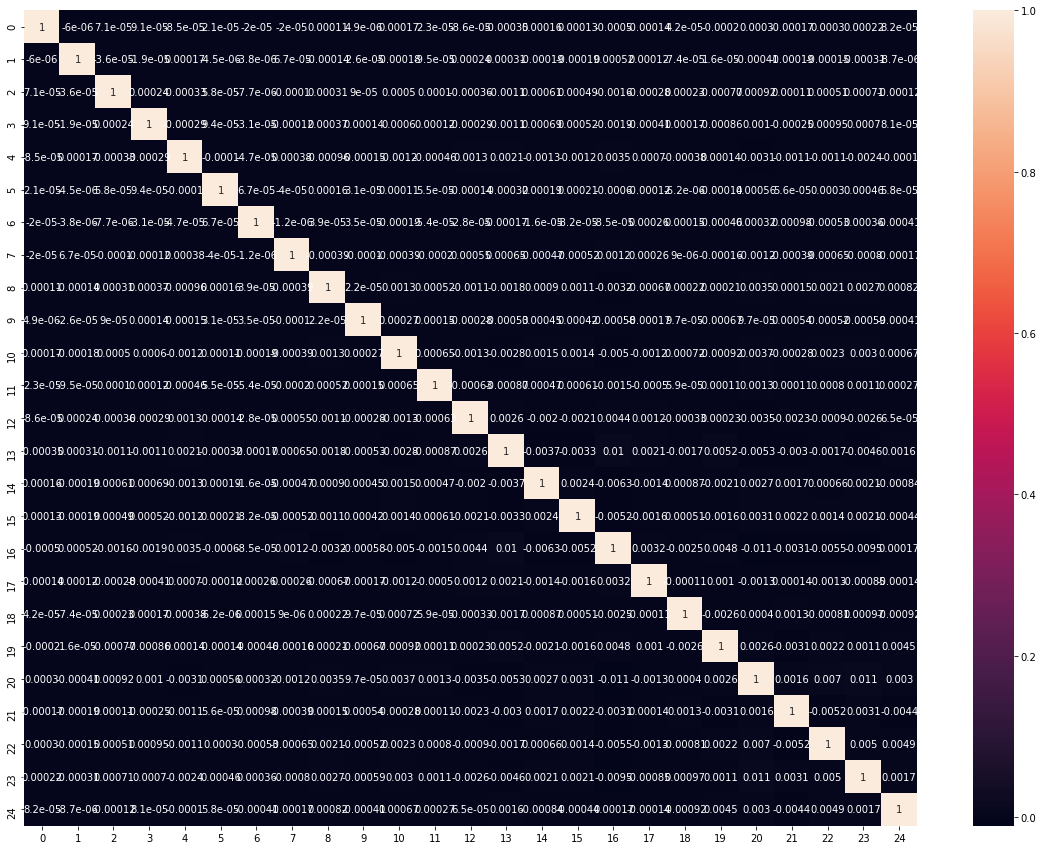

In [81]:
#plotting the correlation matrix
plt.figure(figsize=[20,15])
sns.heatmap(corrmat, annot=True)

### Applying logistic regression on the data on our Principal components

In [82]:
from sklearn.linear_model import LogisticRegression
logsk = LogisticRegression(random_state=42)

In [83]:
model_pca = logsk.fit(X_train_pca, y_train)
round(model_pca.score(X_train_pca, y_train) * 100, 2)

93.83

### Confusion matrix on training dataset

In [84]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_train_pca)
y_pred_df = pd.DataFrame(y_pred) 
y_pred_1 = y_pred_df.iloc[:,[1]] 
y_pred_1.head()

,1
0,0.029739
1,0.017632
2,0.111469
3,0.023555
4,0.013025


In [85]:
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,churn_probability
4,0
15,0
23,0
24,0
27,0


#### Define a new column curn on dataset and predict the new column based on threshold 0.5

In [86]:
# Putting index
y_train_df['Id'] = y_train_df.index
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending y_train_df and y_pred_df
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Id', 'churn_probability', 'churn'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,Id,churn_probability,churn
0,4,0,0.029739
1,15,0,0.017632
2,23,0,0.111469
3,24,0,0.023555
4,27,0,0.013025


In [87]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['churn_predicted'] = y_pred_final.churn.map( lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,Id,churn_probability,churn,churn_predicted
0,4,0,0.029739,0
1,15,0,0.017632,0
2,23,0,0.111469,0
3,24,0,0.023555,0
4,27,0,0.013025,0


### Confusion matrix between predicted and existing dataset

In [88]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.churn_predicted )
confusion

array([[18594,   343],
       [  931,   772]])

In [89]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.churn_predicted)

0.9382751937984496

In [90]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

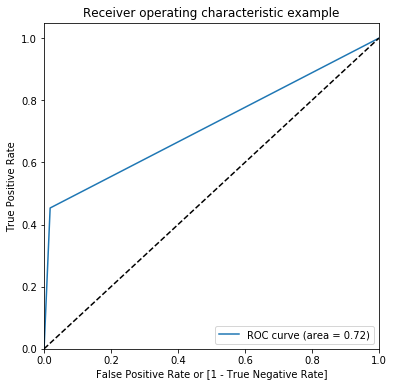

(array([0.        , 0.01811269, 1.        ]),
 array([0.        , 0.45331767, 1.        ]),
 array([2, 1, 0]))

In [91]:
draw_roc(y_pred_final.churn_probability, y_pred_final.churn_predicted)

Calculate the cut-off matrix based on different values we have calculated

In [92]:
from sklearn.metrics import precision_score, recall_score

cutoffmatrix_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num: 
    churn_predicted = y_pred_final.churn.map( lambda x: 1 if x > i else 0)
    cm = metrics.confusion_matrix(y_pred_final.churn_probability, churn_predicted )
    
    total1 = sum(sum(cm))
    
    Accuracy    = (cm[0,0] + cm[1,1]) / total1
    Specificity =  cm[0,0] / (cm[0,0] + cm[0,1])
    Sensitivity =  cm[1,1] / (cm[1,0] + cm[1,1])
    Precision   = precision_score(y_pred_final.churn_probability, churn_predicted)
    Recall      = recall_score(y_pred_final.churn_probability, churn_predicted)
    
    cutoffmatrix_df.loc[i] = [i, Accuracy, Sensitivity, Specificity, Precision, Recall]

cutoffmatrix_df

,Probability,Accuracy,Sensitivity,Specificity,Precision,Recall
0.0,0.0,0.082510,1.000000,0.000000,0.082510,1.000000
0.1,0.1,0.885998,0.762184,0.897133,0.399877,0.762184
0.2,0.2,0.929264,0.629477,0.956223,0.563914,0.629477
0.3,0.3,0.936967,0.557252,0.971115,0.634358,0.557252
0.4,0.4,0.938663,0.508514,0.977346,0.668726,0.508514
0.5,0.5,0.938275,0.453318,0.981887,0.692377,0.453318
0.6,0.6,0.935853,0.378156,0.986006,0.708471,0.378156
0.7,0.7,0.928682,0.241339,0.990495,0.695431,0.241339
0.8,0.8,0.921899,0.100411,0.995775,0.681275,0.100411
0.9,0.9,0.919380,0.027011,0.999630,0.867925,0.027011


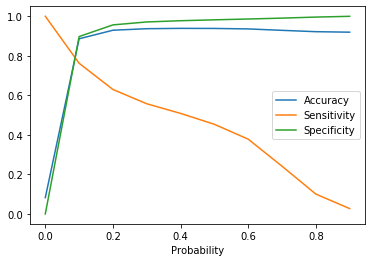

In [93]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoffmatrix_df.plot.line(x = 'Probability', y = ['Accuracy','Sensitivity','Specificity'])
plt.show()

#### From the above graph we see that 0.1 is the actual cutoff

In [94]:
## 0.10 is optimal value
y_pred_final['predicted'] = y_pred_final.churn.map( lambda x: 1 if x > 0.1 else 0)
y_pred_final.head()

,Id,churn_probability,churn,churn_predicted,predicted
0,4,0,0.029739,0,0
1,15,0,0.017632,0,0
2,23,0,0.111469,0,1
3,24,0,0.023555,0,0
4,27,0,0.013025,0,0


In [95]:
## calculate the overall accuracy for predicted
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.predicted)

0.8859980620155039

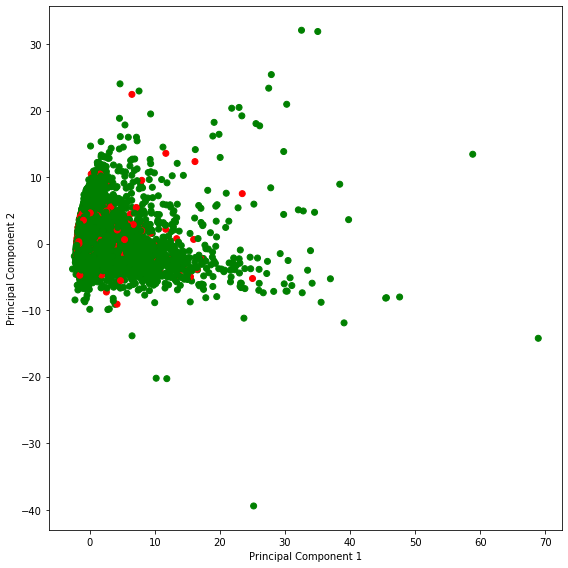

In [96]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()